In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

### DataFrame

#### DataFrame - 생성
    DataFrame은 2차원 배열 형식, 표 같은 스프레드 시트 자료구조
    여러 개의 컬럼을 가지며 서로 다른 종류의 값이 담긴다.
    
    DataFrame은 다양한 방식으로 생성되지만
    가장 흔하게 생성하는 방법으로
    1) 리스트를 값으로 가지는 딕셔너리 방법으로 생성
    2) Numpy 배열을 이용해서 생성
    3) read_csv(), read_excel() 함수 등을 이용해서 생성

In [3]:
# 딕셔너리를 이용해서 생성
dic = {
    "state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
    "year": [2000, 2001, 2002, 2001, 2002, 2003],
    "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]
}

dic_df = DataFrame(dic)
dic_df # Series의 결합체가 DataFrame이다.

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [4]:
type(dic_df.state)
type(dic_df.year)
type(dic_df.pop) # method
type(dic_df["pop"])

pandas.core.series.Series

pandas.core.series.Series

method

pandas.core.series.Series

In [5]:
data1 = {
    "name": ["James", "Peter", "Jane", "Tomas"],
    "address": ["NY", "NY", "LA", "Texas"],
    "age": [33, 44, 55, 66]
}
df1 = DataFrame(data1)
df1

,name,address,age
0,James,NY,33
1,Peter,NY,44
2,Jane,LA,55
3,Tomas,Texas,66


In [6]:
df2 = DataFrame(np.random.randint(10, 100, 16).reshape(4, 4),
               index=list('abcd'))
df2 # columns는 안 써줘서 0 1 2 3

df2.columns = ["one", "two", "three", "four"]
df2

,0,1,2,3
a,74,29,36,36
b,73,38,25,92
c,94,86,81,76
d,59,24,33,51


,one,two,three,four
a,74,29,36,36
b,73,38,25,92
c,94,86,81,76
d,59,24,33,51


In [7]:
df3 = pd.read_csv("../data/tips.csv")
df3

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


#### DataFrame - 구조 확인

In [8]:
df1

,name,address,age
0,James,NY,33
1,Peter,NY,44
2,Jane,LA,55
3,Tomas,Texas,66


In [9]:
df1.index
df1.columns
df1.dtypes
df1.values
df1.shape
df1.T

RangeIndex(start=0, stop=4, step=1)

Index(['name', 'address', 'age'], dtype='object')

name       object
address    object
age         int64
dtype: object

array([['James', 'NY', 33],
       ['Peter', 'NY', 44],
       ['Jane', 'LA', 55],
       ['Tomas', 'Texas', 66]], dtype=object)

(4, 3)

,0,1,2,3
name,James,Peter,Jane,Tomas
address,NY,NY,LA,Texas
age,33,44,55,66


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     4 non-null      object
 1   address  4 non-null      object
 2   age      4 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


#### DataFrame - 데이터 일부 확인

In [11]:
df3

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


In [12]:
# 상 하위 5개
df3.head()
df3.tail()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


,total_bill,tip,sex,smoker,day,time,size
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# 개수 지정
df3.head(2)
df3.tail(8)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0


,total_bill,tip,sex,smoker,day,time,size
237,32.83,1.17,Male,Yes,Sat,Dinner,2.0
238,35.83,4.67,Female,No,Sat,Dinner,3.0
239,29.03,5.92,Male,No,Sat,Dinner,3.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
dtypes: float64(3), object(4)
memory usage: 13.5+ KB


### DataFrame - 컬럼명 변경 및 추가, 삭제

#### 변경

In [15]:
df2

,one,two,three,four
a,74,29,36,36
b,73,38,25,92
c,94,86,81,76
d,59,24,33,51


In [16]:
df2.columns = ["A-class", "B-class", "C-class", "D-class"]
df2

,A-class,B-class,C-class,D-class
a,74,29,36,36
b,73,38,25,92
c,94,86,81,76
d,59,24,33,51


In [17]:
df1

,name,address,age
0,James,NY,33
1,Peter,NY,44
2,Jane,LA,55
3,Tomas,Texas,66


In [18]:
df1.rename(columns={"address": "addr"}) # inplace=False
df1

,name,addr,age
0,James,NY,33
1,Peter,NY,44
2,Jane,LA,55
3,Tomas,Texas,66


,name,address,age
0,James,NY,33
1,Peter,NY,44
2,Jane,LA,55
3,Tomas,Texas,66


In [19]:
df1.rename(columns={"address": "addr"}, inplace=True) # return도 안 함
df1

,name,addr,age
0,James,NY,33
1,Peter,NY,44
2,Jane,LA,55
3,Tomas,Texas,66


#### 추가

In [20]:
df1["phone"] = np.nan # 모든 값은 기본으로 부여
df1

,name,addr,age,phone
0,James,NY,33,NaN
1,Peter,NY,44,NaN
2,Jane,LA,55,NaN
3,Tomas,Texas,66,NaN


In [21]:
df1["phonee"] = ['2', '7', '2', '9']
df1

,name,addr,age,phone,phonee
0,James,NY,33,NaN,2
1,Peter,NY,44,NaN,7
2,Jane,LA,55,NaN,2
3,Tomas,Texas,66,NaN,9


#### 조회

In [22]:
df2.columns = ["one", "two", "three", "four"]
df2

,one,two,three,four
a,74,29,36,36
b,73,38,25,92
c,94,86,81,76
d,59,24,33,51


In [23]:
df2[0:2]
df2['a':'b']

,one,two,three,four
a,74,29,36,36
b,73,38,25,92


,one,two,three,four
a,74,29,36,36
b,73,38,25,92


In [24]:
df2[["one", "three"]] # 괄호 두 개임

,one,three
a,74,36
b,73,25
c,94,81
d,59,33


In [25]:
df2[df2["two"] > 45][["two"]]

,two
c,86


#### DataFrame - 조회 
    iloc, loc : slicing
    iat, at : indexing

In [26]:
df2[df2['two'] > 45].iloc[:, 1:2]

,two
c,86


In [27]:
df1

,name,addr,age,phone,phonee
0,James,NY,33,NaN,2
1,Peter,NY,44,NaN,7
2,Jane,LA,55,NaN,2
3,Tomas,Texas,66,NaN,9


In [28]:
# James, Peter 라인 전부 가져오기...iloc(index loc)
df1.iloc[0:2, 0:5]
df1.iloc[0:2, :]
df1.iloc[:2, :]
df1.iloc[:2]

,name,addr,age,phone,phonee
0,James,NY,33,NaN,2
1,Peter,NY,44,NaN,7


,name,addr,age,phone,phonee
0,James,NY,33,NaN,2
1,Peter,NY,44,NaN,7


,name,addr,age,phone,phonee
0,James,NY,33,NaN,2
1,Peter,NY,44,NaN,7


,name,addr,age,phone,phonee
0,James,NY,33,NaN,2
1,Peter,NY,44,NaN,7


In [29]:
# loc
df1.loc[0:1, "name":"age"]
df1.loc[:1, :"age"]

,name,addr,age
0,James,NY,33
1,Peter,NY,44


,name,addr,age
0,James,NY,33
1,Peter,NY,44


In [30]:
df1 

,name,addr,age,phone,phonee
0,James,NY,33,NaN,2
1,Peter,NY,44,NaN,7
2,Jane,LA,55,NaN,2
3,Tomas,Texas,66,NaN,9


In [31]:
# iat, at
df1.iat[1, 1]
df1.iat[0, 2]

df1.at[1, "addr"]
df1.at[0, "age"]

'NY'

33

'NY'

33

In [32]:
df1.at[2, "age"] = 50
df1

,name,addr,age,phone,phonee
0,James,NY,33,NaN,2
1,Peter,NY,44,NaN,7
2,Jane,LA,50,NaN,2
3,Tomas,Texas,66,NaN,9


In [33]:
# loc를 이용해서 마지막 줄에 결측 값 넣기
# df1.loc[4, :] = np.nan
df1.loc[4] = np.nan
df1

,name,addr,age,phone,phonee
0,James,NY,33.0,NaN,2
1,Peter,NY,44.0,NaN,7
2,Jane,LA,50.0,NaN,2
3,Tomas,Texas,66.0,NaN,9
4,NaN,NaN,NaN,NaN,NaN


In [34]:
df1.drop(4, inplace=True)
df1

,name,addr,age,phone,phonee
0,James,NY,33.0,NaN,2
1,Peter,NY,44.0,NaN,7
2,Jane,LA,50.0,NaN,2
3,Tomas,Texas,66.0,NaN,9


In [35]:
df1.drop("phone", axis=1, inplace=True)
df1

,name,addr,age,phonee
0,James,NY,33.0,2
1,Peter,NY,44.0,7
2,Jane,LA,50.0,2
3,Tomas,Texas,66.0,9


#### DataFrame - 정렬하기
    sort_index()
    sort_values()

In [36]:
df2

,one,two,three,four
a,74,29,36,36
b,73,38,25,92
c,94,86,81,76
d,59,24,33,51


In [37]:
df2.sort_index(ascending=False)
df2.sort_index(axis=1, ascending=False)
df2.sort_values(by=['four'])

,one,two,three,four
d,59,24,33,51
c,94,86,81,76
b,73,38,25,92
a,74,29,36,36


,two,three,one,four
a,29,36,74,36
b,38,25,73,92
c,86,81,94,76
d,24,33,59,51


,one,two,three,four
a,74,29,36,36
d,59,24,33,51
c,94,86,81,76
b,73,38,25,92


#### Tips 실전 데이타로 응용하기

In [38]:
# 1. 상위 3개의 데이타만 조회
df3.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0


In [39]:
#2. tip비율로 정렬(높은 팁이 먼저나오도록..). 샘플데이타 5개만 출력
df3.sort_values(by=['tip'], ascending=False).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3.0
212,48.33,9.00,Male,No,Sat,Dinner,4.0
23,39.42,7.58,Male,No,Sat,Dinner,4.0
59,48.27,6.73,Male,No,Sat,Dinner,4.0
141,34.30,6.70,Male,No,Thur,Lunch,6.0


<AxesSubplot:>

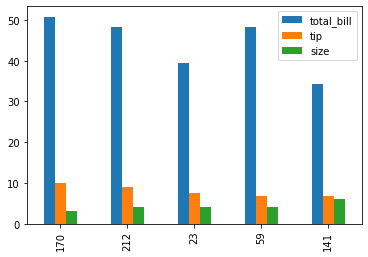

<AxesSubplot:>

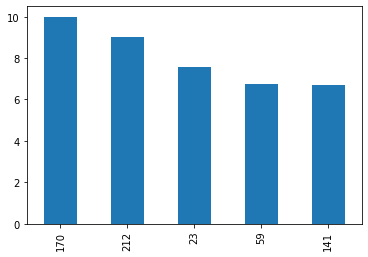

<AxesSubplot:>

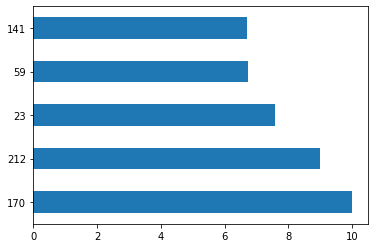

In [40]:
df3.sort_values(by=['tip'], ascending=False).head().plot(kind='bar')
plt.show()

df3.sort_values(by=['tip'], ascending=False).head()['tip'].plot(kind='bar')
plt.show()

df3.sort_values(by=['tip'], ascending=False).head()['tip'].plot(kind='barh')
plt.show()

In [41]:
# 3. 요일별, 팁별로 데이타를 정열 이때, 요일별은 내림차순,팁은 오름차순으로 정렬되도록
# 마지막으로 데이타는 끝에서 7개만 출력되도록

df3.sort_values(by=['day','tip'],ascending=[False, True]).tail(7)

,total_bill,tip,sex,smoker,day,time,size
94,22.75,3.25,Female,No,Fri,Dinner,2.0
221,13.42,3.48,Female,Yes,Fri,Lunch,2.0
91,22.49,3.50,Male,No,Fri,Dinner,2.0
96,27.28,4.00,Male,Yes,Fri,Dinner,2.0
93,16.32,4.30,Female,Yes,Fri,Dinner,2.0
95,40.17,4.73,Male,Yes,Fri,Dinner,4.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN


#### unique(), value_counts(), isin()

In [42]:
df3['day'].unique() # sql disctinct

array(['Sun', 'Sat', 'Thur', 'Fri', nan], dtype=object)

In [43]:
df3['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [44]:
df3['day'].isin(['Sun','Sat'])
df3[df3['day'].isin(['Sun','Sat'])]
df3[df3['day'].isin(['Fri'])]

0       True
1       True
2       True
3       True
4       True
       ...  
240     True
241     True
242     True
243    False
244    False
Name: day, Length: 245, dtype: bool

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3.0
239,29.03,5.92,Male,No,Sat,Dinner,3.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0


,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2.0
91,22.49,3.50,Male,No,Fri,Dinner,2.0
92,5.75,1.00,Female,Yes,Fri,Dinner,2.0
93,16.32,4.30,Female,Yes,Fri,Dinner,2.0
94,22.75,3.25,Female,No,Fri,Dinner,2.0
95,40.17,4.73,Male,Yes,Fri,Dinner,4.0
96,27.28,4.00,Male,Yes,Fri,Dinner,2.0
97,12.03,1.50,Male,Yes,Fri,Dinner,2.0
98,21.01,3.00,Male,Yes,Fri,Dinner,2.0
99,12.46,1.50,Male,No,Fri,Dinner,2.0


#### 누락 데이터 확인하기

In [45]:
df3.isnull().sum()
df3.isnull().sum(axis=1)

total_bill    0
tip           1
sex           1
smoker        1
day           1
time          1
size          1
dtype: int64

0      0
1      0
2      0
3      0
4      0
      ..
240    0
241    0
242    0
243    0
244    6
Length: 245, dtype: int64